In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('paises.csv',delimiter=';')

1 - Por meio do dataset paises.csv, trace dois gráficos de linhas em
um mesmo plano cartesiano, um mostrando a taxa de mortalidade
(Deathrate) e outro a taxa de natalidade (Birthrate) dos países da
América do Norte

In [4]:
filtro = dataset['Region'].str.contains('NORTHERN AMERICA')
paises = dataset[filtro]['Country'].values
deathrate = dataset[filtro]['Deathrate']
birthrate = dataset[filtro]['Birthrate']
print(paises)

['Bermuda ' 'Canada ' 'Greenland ' 'St Pierre & Miquelon '
 'United States ']


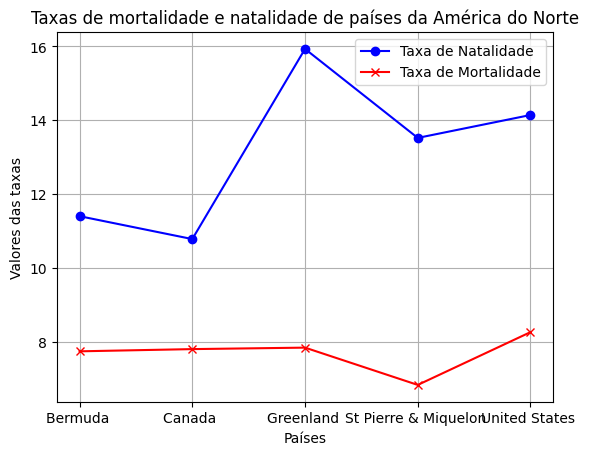

In [5]:
#x = np.arange(len(num_paises))

y1 = deathrate.values
y2 = birthrate.values

plt.title("Taxas de mortalidade e natalidade de países da América do Norte")
plt.xlabel('Países')
plt.ylabel('Valores das taxas')

plt.plot(paises, birthrate, marker='o', label='Taxa de Natalidade', color='b')
plt.plot(paises, deathrate, marker='x', label='Taxa de Mortalidade', color='r')

plt.legend()
plt.grid()

2 - Por meio do dataset space.csv, trace um gráfico em barras
mostrando quantas empresas espaciais diferentes os EUA e a CHINA
possuem;
Dica: não se esqueça de retirar os resultados repetidos

In [6]:
dataset = pd.read_csv('space.csv',delimiter=';')
print(dataset.columns)

Index(['Num', 'Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Cost', 'Status Mission'],
      dtype='object')


(0.0, 21.0)

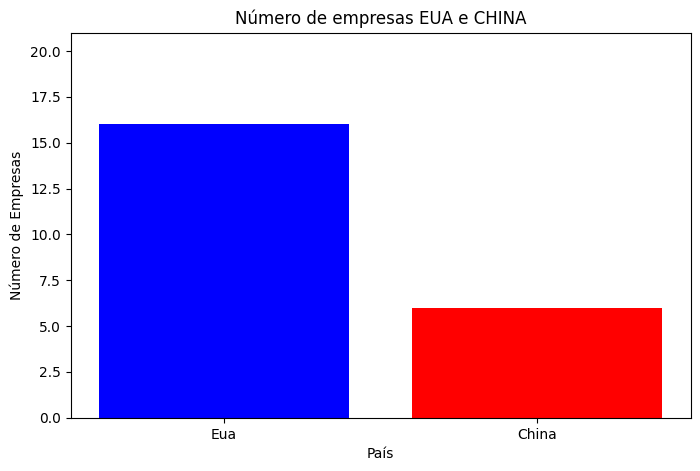

In [7]:
# filtro de países
filtro_eua = dataset['Location'].str.contains('USA')
filtro_china = dataset['Location'].str.contains('China')

# filtro de empresas
empresas_eua = dataset[filtro_eua]['Company Name']
empresas_china = dataset[filtro_china]['Company Name']

# listagem de empresas
lista_empresas_eua = np.unique(empresas_eua, return_counts = True)
lista_empresas_china = np.unique(empresas_china, return_counts = True)

# numero de empresas
num_empresas_eua = len(lista_empresas_eua[0])
num_empresas_china = len(lista_empresas_china[0])

lista_plot = [['Eua','China'],[num_empresas_eua, num_empresas_china]]

plt.figure(figsize=(8, 5))
plt.bar(lista_plot[0], lista_plot[1], color=['blue', 'red'])
plt.title('Número de empresas EUA e CHINA')
plt.xlabel('País')
plt.ylabel('Número de Empresas')
plt.ylim(0, max(lista_plot[1]) + 5)

3 - Por meio do dataset space.csv, trace um gráfico em torta
ilustrando a porcentagem de missões da empresa Roscosmos que
deram certo e que deram errado

Status Mission
Success            51
Failure             3
Partial Failure     1
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x27357f30230>,
 [Text(-1.0714131504339635, 0.2491462644254763, '% Sucessos'),
  Text(1.0714131722150184, -0.2491461707595592, '% Falhas')],
 [Text(-0.58440717296398, 0.13589796241389615, '92.7%'),
  Text(0.5844071848445554, -0.1358979113233959, '7.3%')])

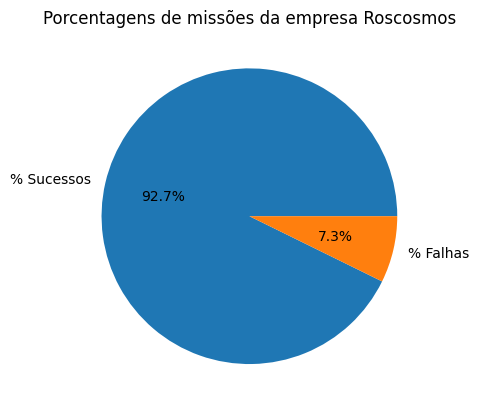

In [11]:
# filtro de empresa
filtro = dataset['Company Name'].str.contains('Roscosmos')

# filtro e separação de variáveis
missoes = dataset[filtro]['Status Mission'].value_counts()
print(missoes)

missoes_sucessos = missoes.get('Success', 0)
missoes_falhas = missoes.get('Failure', 0) + missoes.get('Partial Failure', 0)

#plotagem do gráfico
plt.title('Porcentagens de missões da empresa Roscosmos')
plt.pie(x=[missoes_sucessos, missoes_falhas], labels=['% Sucessos',
'% Falhas'], autopct='%1.1f%%')